# Importing Datasets

In [2]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/Pan Card Detection.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [3]:
!ls

'Pan Card Detection'  'Pan Card Detection.zip'	 sample_data


# importing the Dependencies

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf

In [8]:
pan_card = os.listdir('/content/Pan Card Detection/pan card(949)')
print(pan_card[0:5])
print(pan_card[-5:])

['b409dc95-584133807f05f9e51a93cb0d_pan_page-1.jpg', '62653e9d-58d4b440f2ff0fc766babbae_pan.jpg', 'Untitled.jpg', '11f805a1-imgtopdf_generated_2208201757059_page-44.jpg', 'b547b432-5833f2e1b45169645c7e2b7e_pan.jpg']
['ac037992-5874b9f6985fe65d4d1062c5_pan.jpg', '1f4789b4-589c5db3886b7d4860529009_pan_Sign_page-1.jpg', '6a062d47-imgtopdf_generated_2508201310016_page-174.jpg', '5f0e48bd-58c0d260367dd5b167225f86_pan_page-1.jpg', '0ba9815d-imgtopdf_generated_2208201756030_page-45.jpg']


In [9]:
non_pan_card = os.listdir('/content/Pan Card Detection/non pan card(544)')
print(non_pan_card[0:5])
print(non_pan_card[-5:])

['162.jpg', '172.jpg', '56.jpg', '166.jpg', '112.jpg']
['144.jpg', '174.jpg', '18254a96009f4127b2d277f51eb5608c_frame36_jpg.rf.623f50dc3fa28f8486b2988ab3a523b7.jpg', '170.jpg', '74.jpg']


In [10]:
print("No of pan_card images : ",len(pan_card))
print("No of non_pan_card images : ",len(non_pan_card))

No of pan_card images :  949
No of non_pan_card images :  544


# Creating the labels

In [12]:
pan_card_labels = [1]*949
non_pan_card_labels = [0]*544

In [13]:
print(pan_card_labels[0:5])
print(non_pan_card_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(pan_card_labels))
print(len(non_pan_card_labels))

949
544


In [17]:
labels = pan_card_labels + non_pan_card_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

1493
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# Displaying images

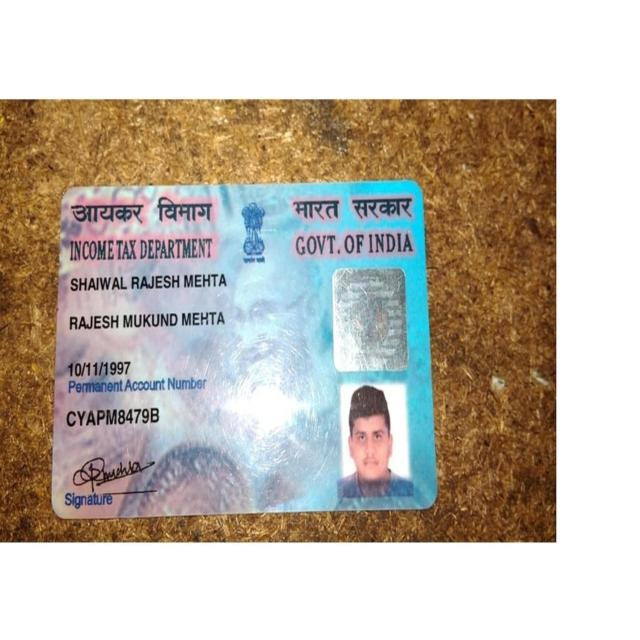

In [19]:
# displaying the pan card image
img = cv2.imread('/content/Pan Card Detection/pan card(949)/0b75bfae-589af2eb080810cd0714d260_pan_Sign_page-1.jpg')
cv2_imshow(img)

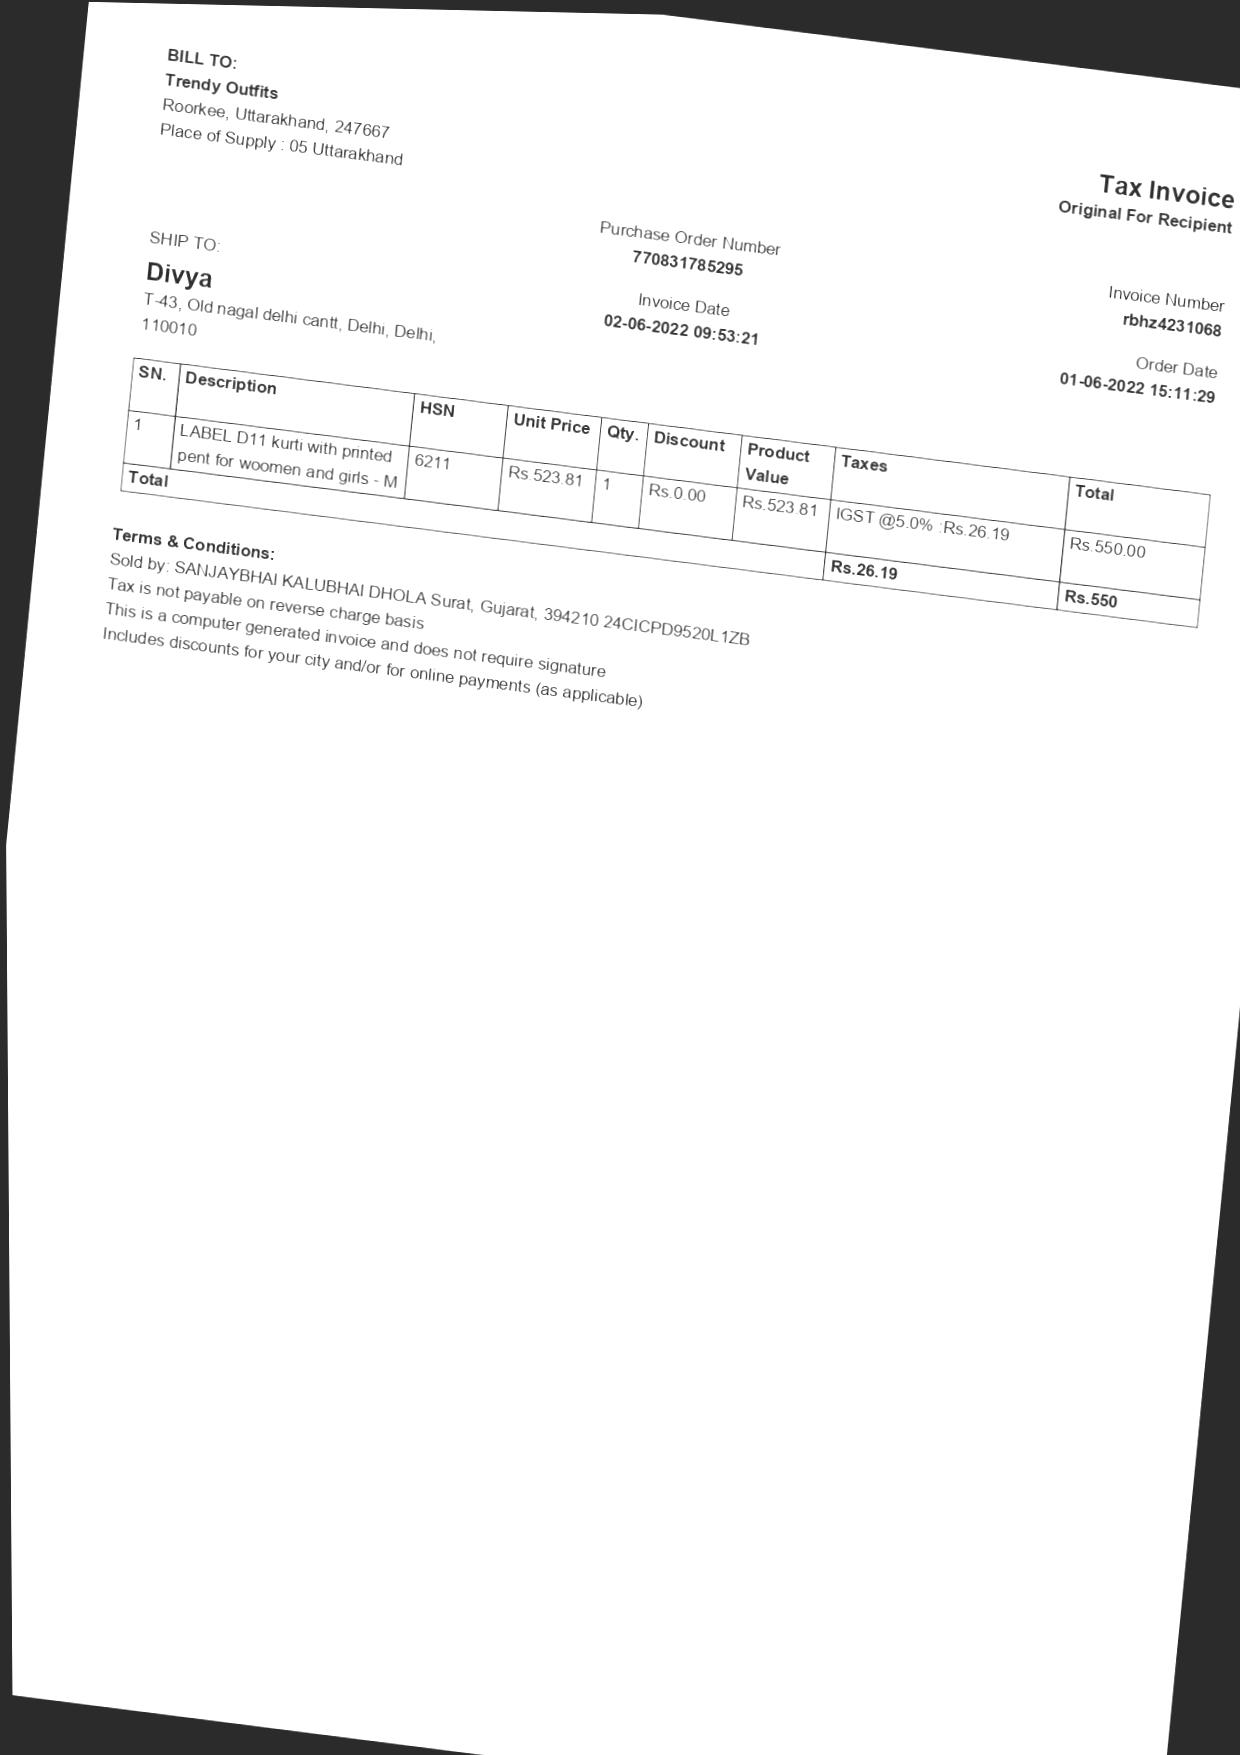

In [21]:
# displaying the non pan card image
img = cv2.imread('/content/Pan Card Detection/non pan card(544)/104.jpg')
cv2_imshow(img)

# Image Processing

In [22]:
# convert images to numpy arrays

data = []

pan_card_path = '/content/Pan Card Detection/pan card(949)'
for img_file in pan_card:
  image = Image.open(os.path.join(pan_card_path, img_file))
  image = image.resize((256, 256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

non_pan_card_path = '/content/Pan Card Detection/non pan card(544)'
for img_file in non_pan_card:
  image = Image.open(os.path.join(non_pan_card_path, img_file))
  image = image.resize((256, 256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [24]:
type(data)

list

In [23]:
print(len(data))

1493


array([[[196, 201, 195],
        [205, 206, 201],
        [210, 207, 204],
        ...,
        [212, 213, 208],
        [212, 213, 208],
        [205, 206, 201]],

       [[202, 207, 201],
        [210, 211, 206],
        [214, 211, 207],
        ...,
        [217, 218, 213],
        [213, 214, 209],
        [207, 208, 203]],

       [[202, 207, 201],
        [209, 210, 206],
        [213, 209, 206],
        ...,
        [225, 226, 221],
        [214, 215, 210],
        [208, 209, 204]],

       ...,

       [[241, 240, 236],
        [247, 246, 242],
        [253, 252, 248],
        ...,
        [242, 243, 238],
        [233, 234, 229],
        [237, 237, 233]],

       [[238, 237, 233],
        [247, 246, 242],
        [248, 247, 243],
        ...,
        [234, 235, 230],
        [226, 227, 222],
        [237, 237, 233]],

       [[237, 236, 232],
        [245, 244, 240],
        [245, 244, 240],
        ...,
        [229, 230, 225],
        [228, 229, 224],
        [238, 240, 234]]], dtype=uint8)
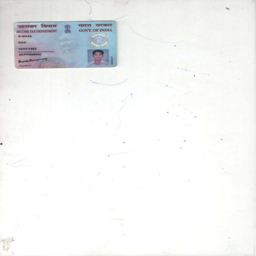

In [25]:
data[0]

In [26]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(256, 256, 3)

In [28]:
# converting the image list and label list to numpy array

X = np.array(data)
y = np.array(labels)

In [29]:
print(X.shape)
print(y.shape)

(1493, 256, 256, 3)
(1493,)


# Splitting the data into Training and Test data

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
print (X.shape , X_train.shape , X_test.shape)
print (y.shape , y_train.shape , y_test.shape)

(1493, 256, 256, 3) (1194, 256, 256, 3) (299, 256, 256, 3)
(1493,) (1194,) (299,)


In [32]:
# scaling the data
X_train = X_train/255
X_test  = X_test/255

In [33]:
print(X_train[0])

[[[0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 ...

 [[0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]


# Building the Convolutional Neural Network

In [34]:
# initializing the cnn
cnn = tf.keras.models.Sequential()

In [35]:
# convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[256,256,3]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
#Adding second convolutional layer and pooling
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [38]:
#Flattenning
cnn.add(tf.keras.layers.Flatten())

In [39]:
#Full connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

In [40]:
#output layer
cnn.add(tf.keras.layers.Dense(units=2,activation='sigmoid'))

# Training the Convolutional Neural Network

In [41]:
#compiling the cnn
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
#training the neural network on training set and validating on validation split
history = cnn.fit(X_train,y_train,validation_split=0.1,epochs=25)

Epoch 1/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step - accuracy: 0.6463 - loss: 1.9836 - val_accuracy: 0.9333 - val_loss: 0.2487
Epoch 2/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9270 - loss: 0.1756 - val_accuracy: 0.9333 - val_loss: 0.1154
Epoch 3/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9641 - loss: 0.1032 - val_accuracy: 0.9583 - val_loss: 0.1356
Epoch 4/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9815 - loss: 0.0764 - val_accuracy: 0.9500 - val_loss: 0.1188
Epoch 5/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9806 - loss: 0.0494 - val_accuracy: 0.9583 - val_loss: 0.1651
Epoch 6/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9891 - loss: 0.0256 - val_accuracy: 0.9417 - val_loss: 0.1886
Epoch 7/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9935 - loss: 0.0168 - val_accuracy: 0.9417 - val_loss: 0.1739
Epoch 8/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.9417 -

# Model Evaluation

In [43]:
loss , accuracy = cnn.evaluate(X_test,y_test)
print("Loss : ",loss)
print("Accuracy : ",accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.9092 - loss: 0.8292
Loss :  0.6373658776283264
Accuracy :  0.9230769276618958


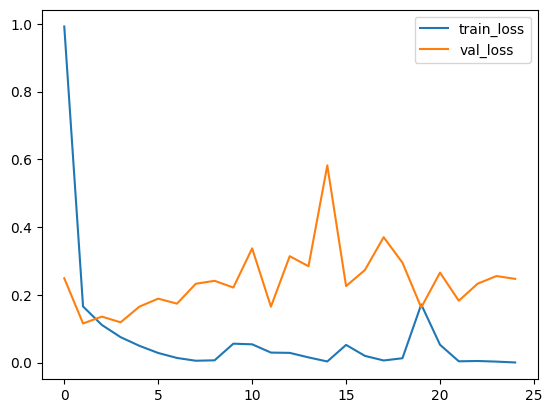

In [44]:
h = history

#plot loss value
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

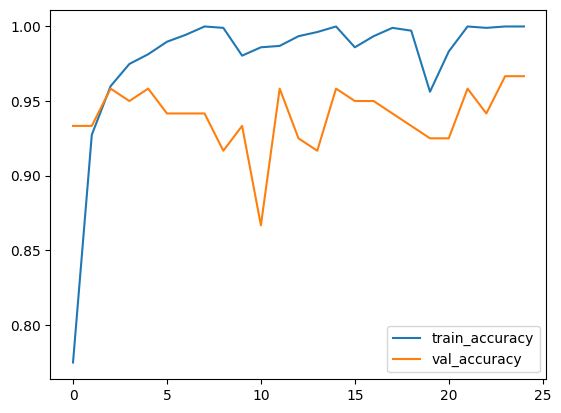

In [45]:
#plot accuracy value
plt.plot(h.history['accuracy'],label='train_accuracy')
plt.plot(h.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


# Building a predictive system

path of the image to be predicted :/content/Pan Card Detection/pan card(949)/0e626de1-56a8-4965-acaf-811ceae3c038_pancard_content_1708019802.jpg


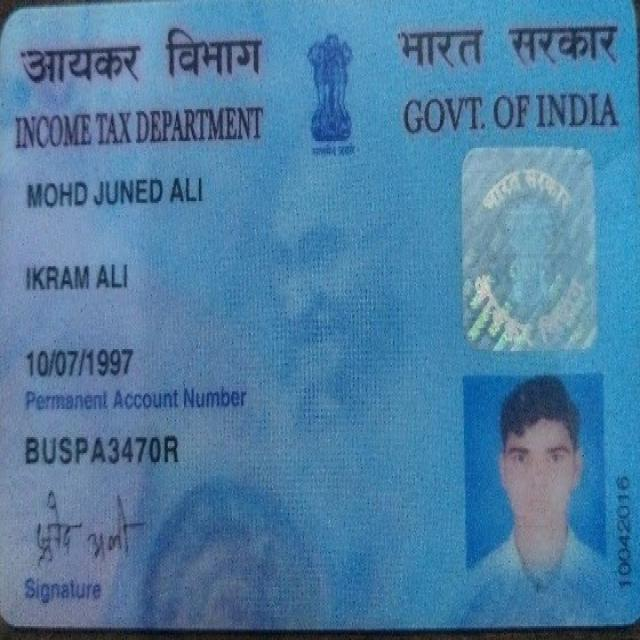

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.22523052 0.9998666 ]]
1
This an pan card


In [46]:

input_image_path = input('path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(256,256))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,256,256,3])

input_prediction = cnn.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('This an pan card')
else:
  print('This is not pan card')

path of the image to be predicted :/content/Pan Card Detection/non pan card(544)/144.jpg


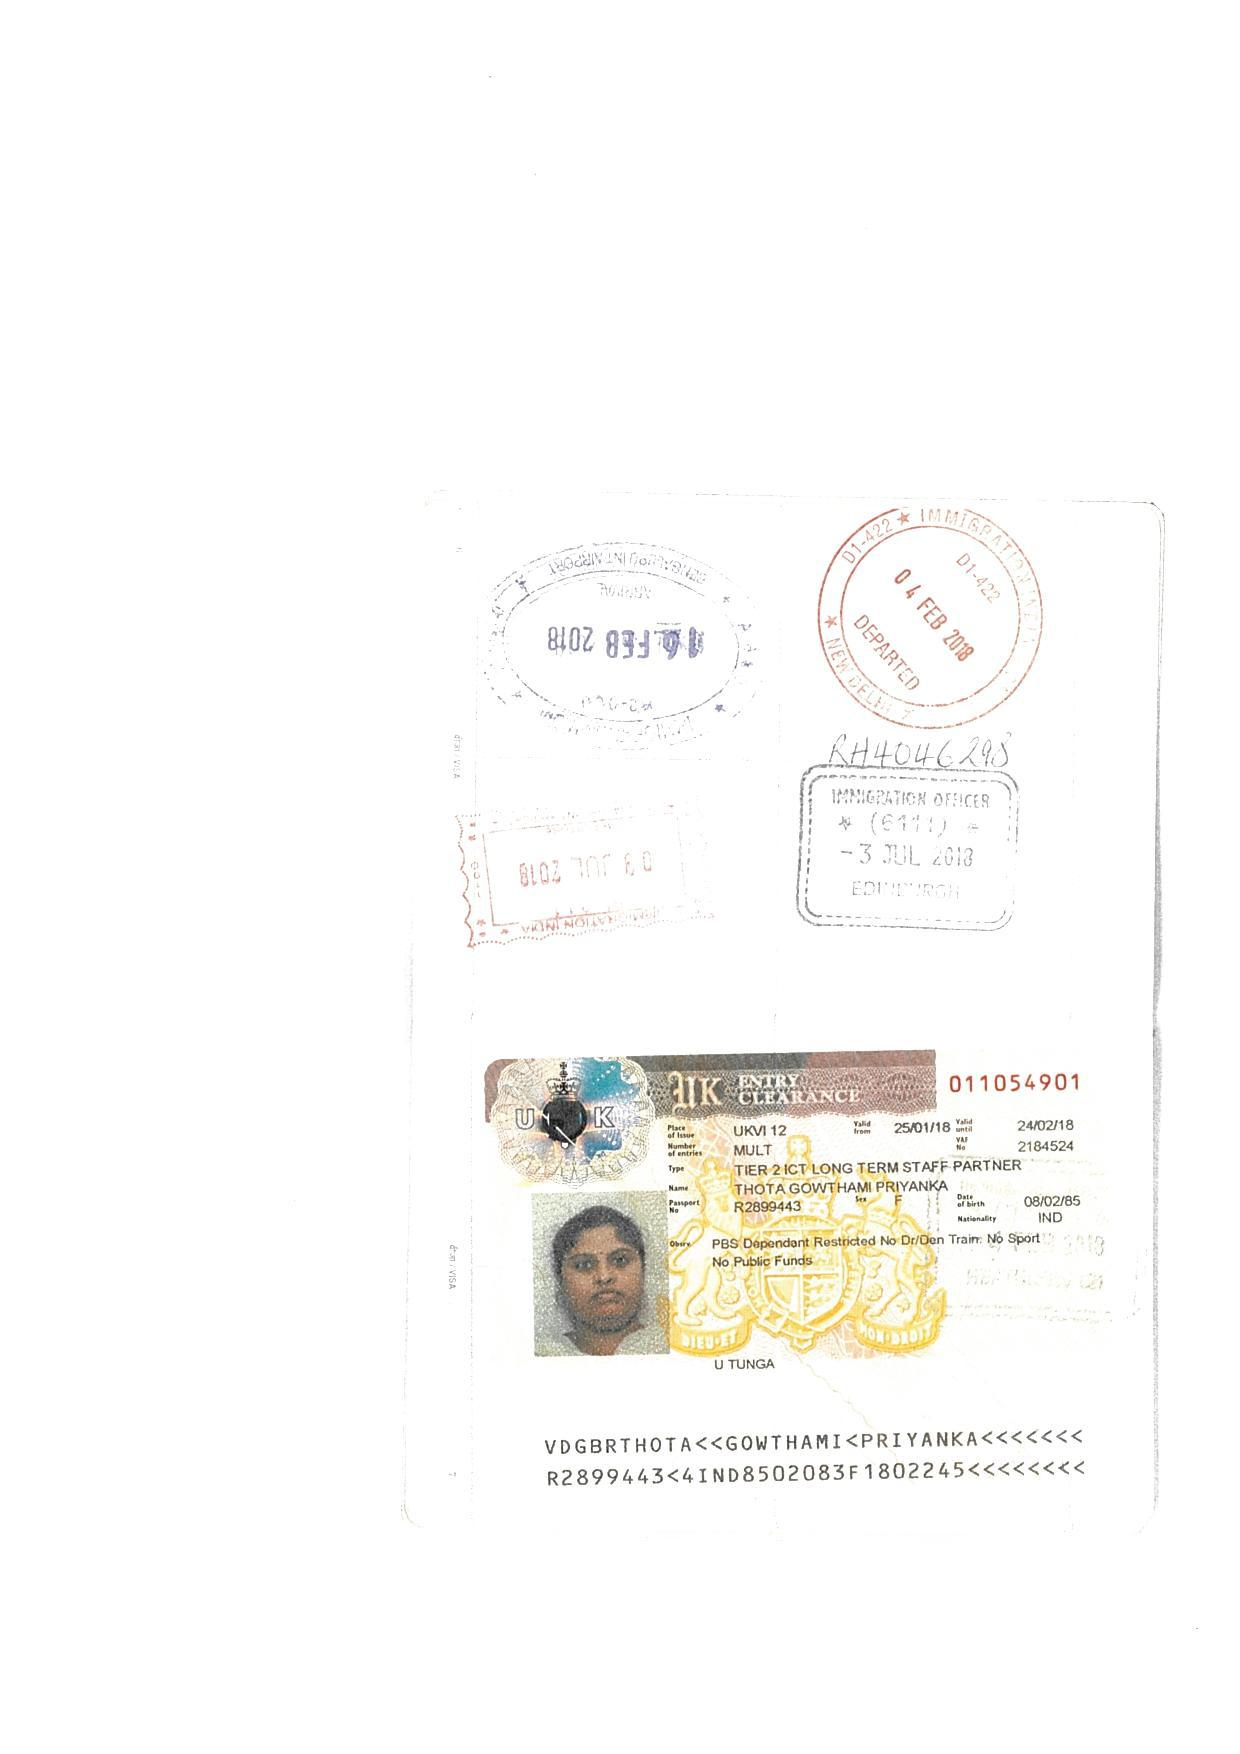

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.99823165 0.00421888]]
0
This not a pan_card


In [47]:
input_image_path = input('path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(256,256))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,256,256,3])

input_prediction = cnn.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('This an pan_card')
else:
  print('This not a pan_card')